In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import dateutil 

In [3]:
stats_path = '../models/plays-small-batches/stats.csv'

In [4]:
def load_stats():
    with open(stats_path) as file:
        headers, *rows = file.readlines()
    
    # print(headers)
    print("%d rows" % len(rows))

    return rows



In [5]:
def datestr2num(str):
    return dateutil.parser.parse(str).timestamp()

def float_or_none(str):
    if str is None or str == b'' or str == b'0.0':
        return np.nan
    
    return float(str)
    
converters = {
    1: datestr2num,
    2: datestr2num,
    3: datestr2num,
    5: float_or_none,
    6: float_or_none,
    7: float_or_none,
}


In [39]:
def trend(x, y):
    idx = np.isfinite(y)
    z = np.polyfit(x[idx], y[idx], 1)
    p = np.poly1d(z)
    
    return p
    
def plot(ndarray):
    fig, ax1 = plt.subplots(figsize=(16, 8))
  
    x = ndarray[:, 0]
    loss = ax1.plot(x, ndarray[:, [4]], 'r')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_yscale("log")

    ax2 = ax1.twinx()
    ax2.yaxis.tick_right()
    acc = ax2.plot(x, ndarray[:, [5, 6, 7]], 'x')
    
    ax1.plot(x, trend(x, ndarray[:, 4])(x), color=loss[0].get_color(), linestyle='--')
    ax2.plot(x, trend(x, ndarray[:, 5])(x), color=acc[0].get_color(), linestyle=':')
    ax2.plot(x, trend(x, ndarray[:, 6])(x), color=acc[1].get_color(), linestyle=':')
    ax2.plot(x, trend(x, ndarray[:, 7])(x), color=acc[2].get_color(), linestyle=':')

    ax2.set_ylabel('Accuracy')
    ax1.legend(loss + acc, ['Loss', 'Precision', 'Recall', 'F-Score'], loc=2)
    plt.grid(True)
    plt.show()

In [40]:
def reload():
    rows = load_stats()
    stats = np.loadtxt(rows, delimiter=",", converters=converters, skiprows=0)
    
    plot(stats[599:])

752 rows


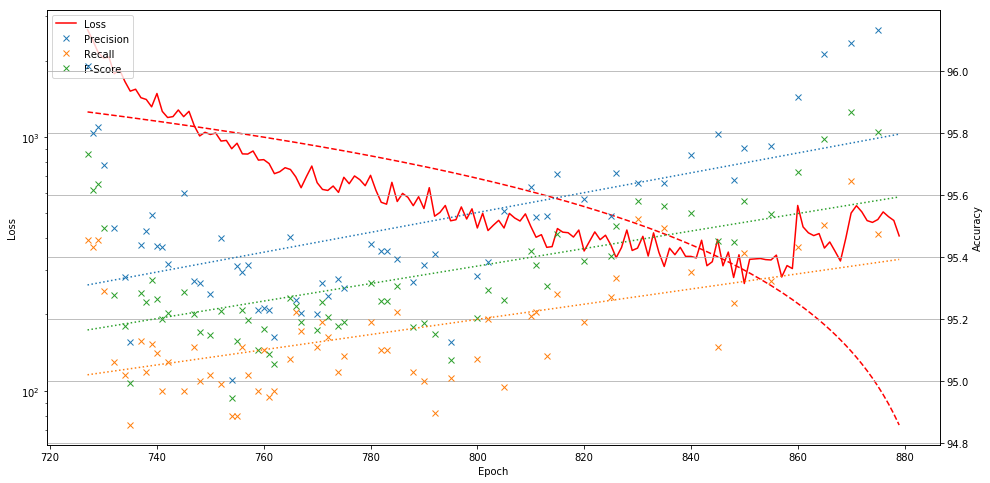

In [47]:
reload()